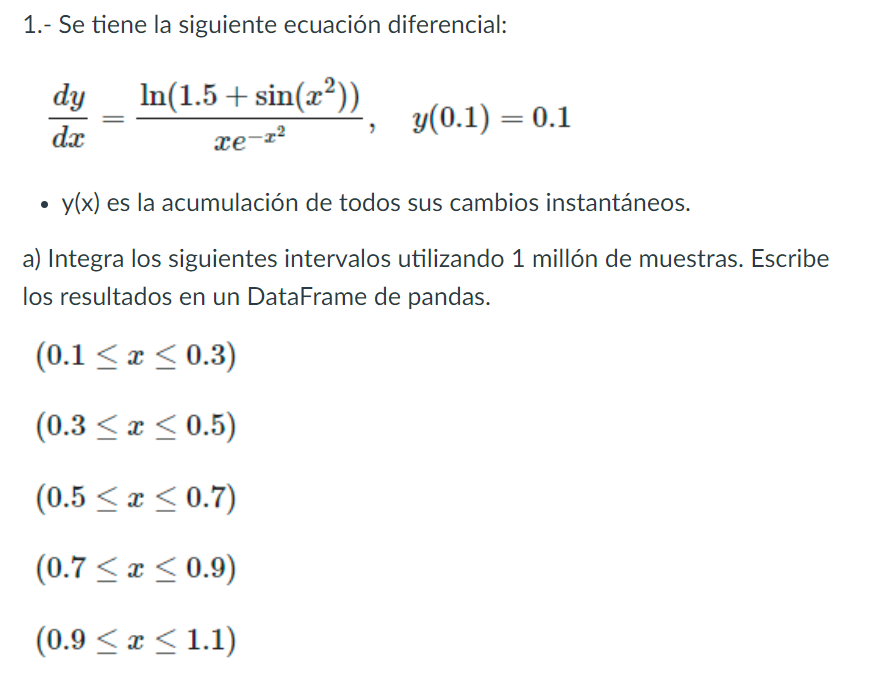

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def ec_1(x):
    return (np.log(1.5 +np.sin(x**2)))/(x*np.exp(-x**2))
    
def MontecarloTipoUno(f,a,b,n):
    u = np.random.uniform(a,b,n)
    return np.mean(f(u))*(b-a)


#y(x) es el promedio 
int1 =MontecarloTipoUno(ec_1,0.1,0.3,1000000)
int2 =MontecarloTipoUno(ec_1,0.3,0.5,1000000)
int3 =MontecarloTipoUno(ec_1,0.5,0.7,1000000)
int4 =MontecarloTipoUno(ec_1,0.7,0.9,1000000)
int5 =MontecarloTipoUno(ec_1,0.9,1.1,1000000)
int1,int2,int3,int4,int5

(0.48964436233784087,
 0.302109146410116,
 0.29683149119299934,
 0.3534294763041285,
 0.4653309232796946)

In [4]:

tabla = pd.DataFrame(columns = ["int1","int2","int3","int4","int5"],index=[1000000])
tabla["int1"] = int1
tabla["int2"] = int2
tabla["int3"] = int3
tabla["int4"] = int4
tabla["int5"] = int5
tabla

,int1,int2,int3,int4,int5
1000000,0.489644,0.302109,0.296831,0.353429,0.465331


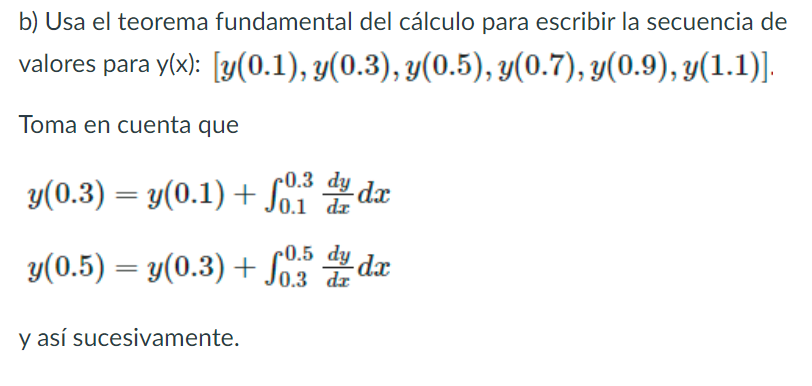

In [6]:
y0_1 = 0.1
y0_3 = y0_1 + int1
y0_5 = y0_3 + int2
y0_7 = y0_5 + int3
y0_9 = y0_7 + int4
y1_1 = y0_9 + int5
y0_1,y0_3,y0_5,y0_7,y0_9,y1_1

(0.1,
 0.5896443623378409,
 0.8917535087479569,
 1.1885849999409563,
 1.542014476245085,
 2.0073453995247794)

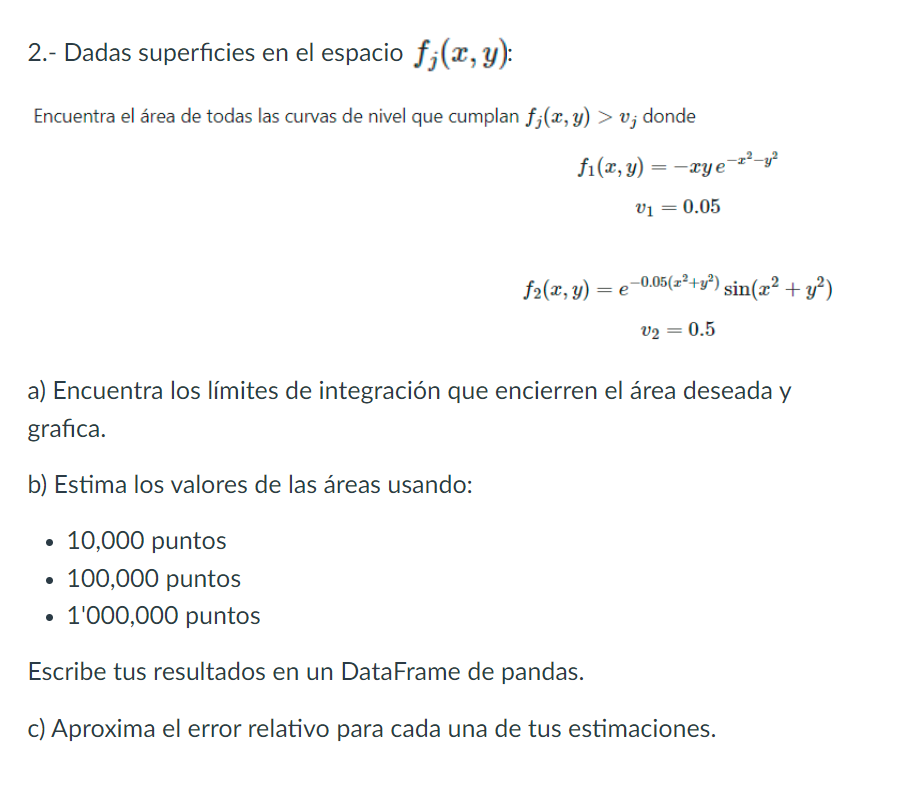

In [11]:
def montecarlo_tipo2(region,ax,bx,ay,by,n):
    x = np.random.uniform(ax,bx,n)
    y = np.random.uniform(ay,by,n)
    AR = (bx-ax)*(by-ay)
    return region(x,y).mean()*AR
    

In [13]:
def func_1(x,y):
    return (-x)*y*np.exp(-x**2-y**2) > 0.05

def func_2(x,y):
    return np.exp((-0.05)*(x**2 + y**2))*np.sin(x**2 + y**2) > 0.5


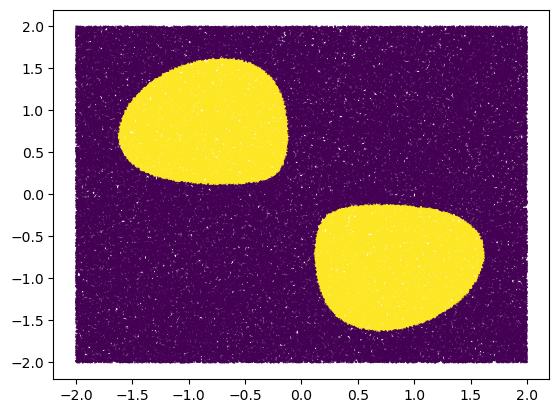

In [15]:
ax =-2
bx = 2
ay = -2
by = 2

n =200000
x = np.random.uniform(ax,bx,n)
y =np.random.uniform(ay,by,n)


plt.figure()
plt.scatter(x,y,c = func_1(x,y), s=0.2)

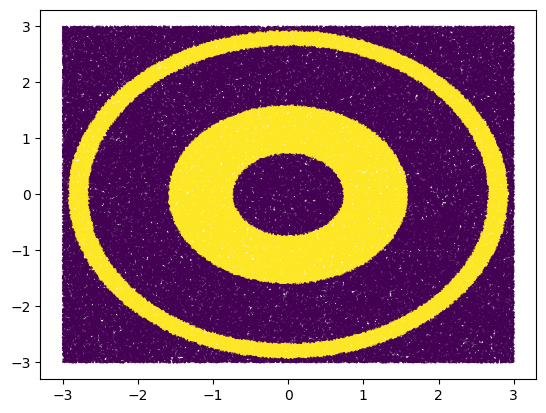

In [16]:
ax2 =-3
bx2 = 3
ay2 = -3
by2 = 3

n2 =200000
x2 = np.random.uniform(ax2,bx2,n2)
y2 =np.random.uniform(ay2,by2,n2)

func_2(x2,y2)
plt.figure()
plt.scatter(x2,y2,c = func_2(x2,y2), s=0.2)

In [19]:
#integrales
func1_1 =montecarlo_tipo2(func_1,-2,2,-2,2,10000)
func1_2 =montecarlo_tipo2(func_1,-2,2,-2,2,100000)
func1_3 =montecarlo_tipo2(func_1,-2,2,-2,2,1000000)

func2_1 = montecarlo_tipo2(func_2,-3,3,-3,3,10000)
func2_2 = montecarlo_tipo2(func_2,-3,3,-3,3,100000)
func2_3 = montecarlo_tipo2(func_2,-3,3,-3,3,1000000)
func1_1,func1_2,func1_3,func2_1,func2_2,func2_3

(3.64, 3.6712, 3.684592, 10.7568, 11.023200000000001, 10.90458)

In [33]:
#errores func_1

n_1=10000
n_2=100000
n_3=1000000
AR1 = (bx-ax)*(by-ay)
AR2 = (bx2-ax2)*(by2-ay2)
Crel1_1 = np.sqrt((1 - func1_1/AR1)/(func1_1/AR1))
Erel1_1 = np.log10(Crel1_1) - np.log10(n_1)/2
Crel1_2 = np.sqrt((1 - func1_2/AR1)/(func1_2/AR1))
Erel1_2 = np.log10(Crel1_2) - np.log10(n_2)/2
Crel1_3 = np.sqrt((1 - func1_3/AR1)/(func1_3/AR1))
Erel1_3 = np.log10(Crel1_3) - np.log10(n_3)/2

#errores func_2
Crel2_1 = np.sqrt((1 - func2_1/AR2)/(func2_1/AR2))
Erel2_1 = np.log10(Crel2_1) - np.log10(n_1)/2
Crel2_2 = np.sqrt((1 - func2_2/AR2)/(func2_2/AR2))
Erel2_2 = np.log10(Crel2_2) - np.log10(n_2)/2
Crel2_3 = np.sqrt((1 - func1_3/AR2)/(func1_3/AR2))
Erel2_3 = np.log10(Crel2_3) - np.log10(n_3)/2
Erel1_1,Erel1_2,Erel1_3,Erel2_1,Erel2_2,Erel2_3

(-1.7345414564481294,
 -2.2369436186253298,
 -2.737970300284615,
 -1.814769342860802,
 -2.3223854454281008,
 -2.5284898806611635)

In [55]:
N = np.logspace(4,6,3)
tabla2 = pd.DataFrame(columns = ["f1_1", "Error f1_1","f1_2","Error f1_2","f1_3","Error f1_3","f2_1","Error f2_1","f2_2","Error f2_2","f2_3","Error f2_3"],index = N)

tabla2.loc[10000,"f1_1"] = func1_1
tabla2.loc[10000,"Error f1_1"] = Erel1_1
tabla2.loc[100000,"f1_2"] = func1_2
tabla2.loc[100000,"Error f1_2"] = Erel1_2
tabla2.loc[1000000,"f1_3"] = func1_3
tabla2.loc[1000000,"Error f1_3"] = Erel1_3

tabla2.loc[10000,"f2_1"] = func2_1
tabla2.loc[10000,"Error f2_1"] = Erel2_1
tabla2.loc[100000,"f2_2"] = func2_2
tabla2.loc[100000,"Error f2_2"] = Erel2_2
tabla2.loc[1000000,"f2_3"] = func2_3
tabla2.loc[1000000,"Error f2_3"] = Erel2_3


tabla3 = pd.DataFrame(columns = ["f1","f2","f1_error","f2_error"],index = N)

tabla3.loc[10000,"f1"] = func1_1
tabla3.loc[100000,"f1"] = func1_2
tabla3.loc[1000000,"f1"] = func1_3

tabla3.loc[10000,"f2"] = func2_1
tabla3.loc[100000,"f2"] = func2_2
tabla3.loc[1000000,"f2"] = func2_3
tabla3.loc[10000,"f1_error"] = Erel1_1
tabla3.loc[100000,"f1_error"] = Erel1_1
tabla3.loc[1000000,"f1_error"] = Erel1_1

tabla3

,f1,f2
10000.0,3.64,10.7568
100000.0,3.6712,11.0232
1000000.0,3.684592,10.90458
